# Import Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('max_rows',None)
pd.set_option('max_columns',None)

# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/breast_cancer.csv')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Data Preprocessing

In [ ]:
print(df.isnull().values.any())
print(df.isna().values.any())

False
False


In [ ]:
df = df.drop(['Sample code number'],axis=1)

In [ ]:
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [ ]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Feature Engineering

## Splitting Train and Test Dataset

In [ ]:
x = df.iloc[:, 0:9]
x.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [ ]:
y = df.iloc[:,-1]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

# Training ML Model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [ ]:
Y_pred = lr.predict(X_test)

In [ ]:
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),np.array(Y_test).reshape(len(Y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf_matrix = confusion_matrix(Y_test,Y_pred,normalize='true')

In [ ]:
print(accuracy_score(Y_test,Y_pred))

0.9562043795620438


<AxesSubplot:>

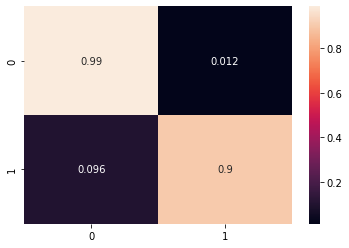

In [ ]:
sns.heatmap(conf_matrix,annot=True)